# Importações

In [16]:
import pandas as pd
import ast
import datetime
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Carregamento de arquivos

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
raw_file = "/content/drive/MyDrive/tcc/bases_de_dados/bases_cruas/submissions_total_2023_04_06.csv"
clean_file = "/content/drive/MyDrive/tcc/bases_de_dados/bases_tratadas/base_preprocessada.csv"
lexico_file = "/content/drive/MyDrive/tcc/bases_de_dados/bases_cruas/lexico_traduzido.txt"

In [19]:
df_clean = pd.read_csv(clean_file, sep = ',', encoding = 'utf-8')
df_raw = pd.read_csv(raw_file, sep = ',', encoding = 'utf-8')
lexico = pd.read_csv(lexico_file, sep = ',', encoding = 'latin1')

In [20]:
# Pequenos tratamentos de texto
df_clean['clean_text'] = df_clean['clean_text'].apply(ast.literal_eval)

df_raw['title'] = df_raw['title'].apply(lambda x: str(x))
df_raw['selftext'] = df_raw['selftext'].apply(lambda x: str(x))
df_raw['full_text'] = df_raw[['title', 'selftext']].apply(" ".join, axis =1)

In [21]:
#Separando listas de texto corrido pra wordcloud
clean_text = ' '.join([' '.join(text) for text in df_clean['clean_text']])
raw_text = ' '.join([''.join(text) for text in df_raw['full_text']])

# Alguns números

In [22]:
df_clean.head(2)

,coments,created,id,selftext,title,up,full_text,qtd_term,clean_text
0,118.0,1.610661e+09,t3_kxfnzb,"Olá, meu nome é Gabriel, tenho 18 anos e moro ...",Hoje é o dia mais sombrio da minha cidade.,1850.0,"['hoje', 'e', 'o', 'dia', 'mais', 'sombrio', '...",6,"[dia, sombrio, cidade, nome, ano, morar, manau..."
1,808.0,1.658598e+09,t3_w69jxb,"Em 2019 reencontrei minha primeira namorada, v...",Meu casamento me destruiu financeiramente.,1558.0,"['meu', 'casamento', 'me', 'destruiu', 'financ...",6,"[casamento, primeiro, ano, relacionamento, pat..."


## Quantidade de submissions antes e depois da seleção da amostra por palavras do léxico

In [23]:
print(f' O total de dados coletados foi: {len(df_raw)} \n O total de dados filtrados com o léxico foi: {len(df_clean)}')

 O total de dados coletados foi: 2028 
 O total de dados filtrados com o léxico foi: 267


## Range de datas dos submissions

In [24]:
df_clean['created'] = df_clean['created'].apply(lambda x: datetime.datetime.utcfromtimestamp(x).strftime('%Y/%m'))

In [25]:
total_casos = len(df_clean['created'])
df_clean_group = df_clean.groupby('created').count()['clean_text']
df_clean_group = df_clean_group.apply(lambda x: (x/total_casos)*100)
df_clean_group = df_clean_group.reset_index()

In [26]:
print(max(df_clean_group['created']), min(df_clean_group['created']))

2023/04 2020/04


(array([[ 6.,  6.,  5.,  6.,  5.,  6.,  1.,  0.,  0.,  0.],
        [34.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]]),
 array([ 0.        ,  5.58052434, 11.16104869, 16.74157303, 22.32209738,
        27.90262172, 33.48314607, 39.06367041, 44.64419476, 50.2247191 ,
        55.80524345]),
 <a list of 2 BarContainer objects>)

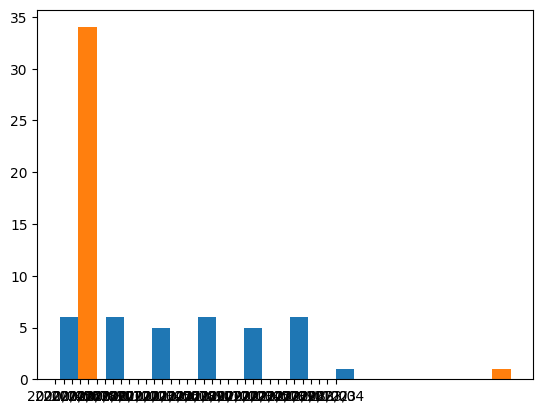

In [27]:
plt.hist(df_clean_group)

# Word cloud

## Raw

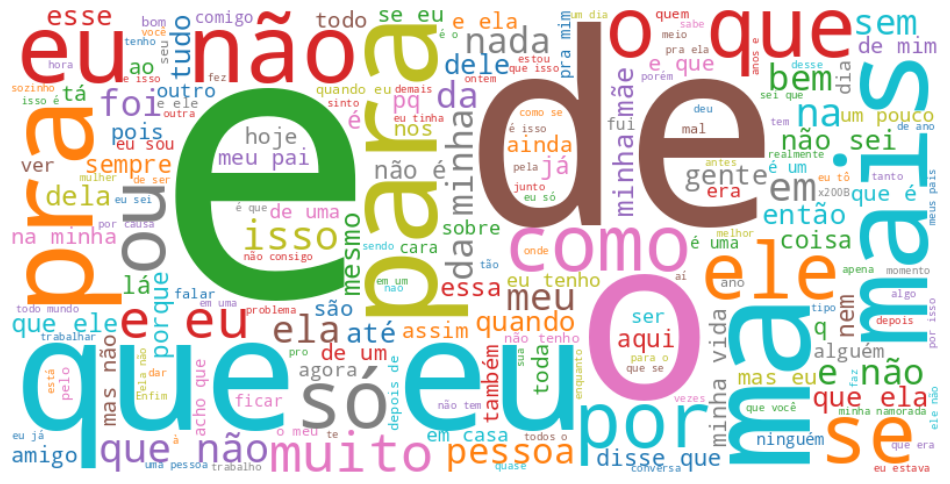

In [43]:
wordcloud = WordCloud(width=800, height=400, background_color='white', random_state = 2, colormap = 'tab10').generate(raw_text)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Clean

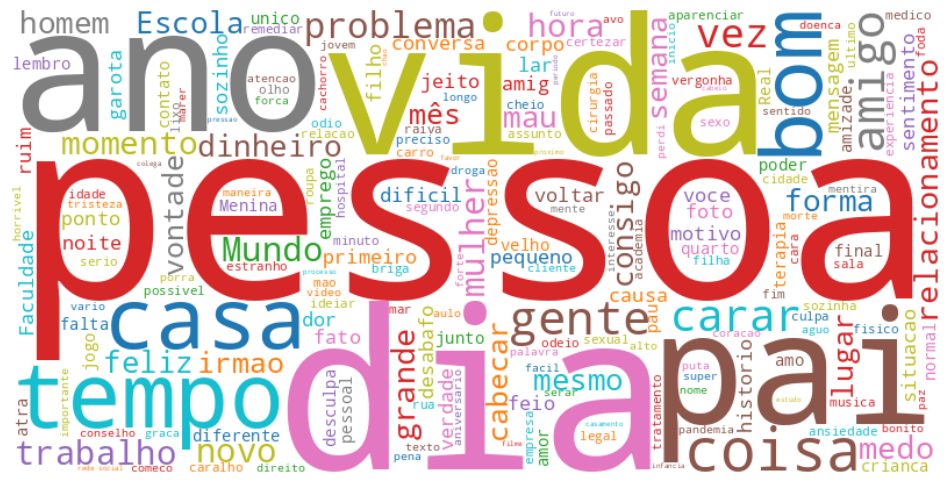

In [44]:
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap = 'tab10').generate(clean_text)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [30]:
'pra', 'nao', 'ate', 'ja', 'etc', 'porem', 'ta', 'estao', 'pro', 'alguma', 'vao', 'oq', 'n', 'q', 'voce', 'apos', 'ne', 'muita', 'mim', 'dela', 'literalmente'

('pra',
 'nao',
 'ate',
 'ja',
 'etc',
 'porem',
 'ta',
 'estao',
 'pro',
 'alguma',
 'vao',
 'oq',
 'n',
 'q',
 'voce',
 'apos',
 'ne',
 'muita',
 'mim',
 'dela',
 'literalmente')

# Lexico

In [31]:
len(lexico)

1265